In [1]:
#importing libraries
import numpy as np

### Complete graph

In [2]:
#Creating a function to generate a complete graph
def complete_graph(n):
    matrix = np.ones((n,n))
    np.fill_diagonal(matrix,0)
    
    #connected neighbours
    degree=matrix.sum(1)
    
    # creating transition matrix
    transition_mtx = np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            if matrix[i][j]==1:
                transition_mtx[i][j]=1/degree[i]
            else:
                transition_mtx[i][j]=0
                
    return transition_mtx


In [3]:
#Checking
transition_G = complete_graph(6) 

In [4]:
transition_G

array([[0. , 0.2, 0.2, 0.2, 0.2, 0.2],
       [0.2, 0. , 0.2, 0.2, 0.2, 0.2],
       [0.2, 0.2, 0. , 0.2, 0.2, 0.2],
       [0.2, 0.2, 0.2, 0. , 0.2, 0.2],
       [0.2, 0.2, 0.2, 0.2, 0. , 0.2],
       [0.2, 0.2, 0.2, 0.2, 0.2, 0. ]])

### Joined Graphs

In [22]:
def joined_graphs(n):
    if n%2==0:
        matrix = np.zeros((n,n))
        for i in range(0,n//2):
            for j in range(0,n//2):
                matrix[i][j]=1
        for p in range(n//2,n):
            for q in range(n//2,n):
                matrix[p][q]=1
        np.fill_diagonal(matrix,0)
        
        #connecting 2 graphs
        g1 = np.random.randint(0,n/2)
        g2 = np.random.randint(n/2,n)
        bottleneck = [g1,g2]
        matrix[g1][g2]=1
        matrix[g2][g1]=1

    # creating transition matrix
        degree=matrix.sum(1)
        transition_mtx = np.zeros((n,n))
        for x in range(n):
            for y in range(n):
                if matrix[x][y]==1:
                    transition_mtx[x][y]=1/degree[x]
                else:
                    transition_mtx[x][y]=0
        #print('bottleneck is',bottleneck)
        return transition_mtx
    else:
        print('Choose even number')

In [23]:
#Checking
transition_halfG = joined_graphs(4)
transition_halfG

array([[0. , 0.5, 0. , 0.5],
       [1. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 1. ],
       [0.5, 0. , 0.5, 0. ]])

### first jump

In [24]:
#creating function for the first jump
def first_jump(trans_matrix,start):
    state = trans_matrix[start,:]
    U = np.random.uniform()
    lower_bound = 0
    for i in range(len(state)):
        lower_bound += state[i]
        if U <= lower_bound:
            return i

In [25]:
#checking full graph
first_jump(transition_G,4)

2

### Total jumps


In [26]:
def get_walk(trans_matrix,start):
    
    vertices = len(trans_matrix)   
    
    walks = [start]
    uniq_walk = {start}
    
    while len(uniq_walk) < vertices:
        st = walks[-1]
        w = first_jump(trans_matrix,st)
        walks.append(w)
        uniq_walk.add(w)
    total_jump = len(walks)
    return total_jump   

In [27]:
#checking complete graph
total_walks_full = get_walk(transition_G,0)
total_walks_full

9

In [28]:
#checking half graph
total_walks_joined = get_walk(transition_halfG,0)
total_walks_joined

5

### Expected cover time

In [29]:
def Exp_cover_time(trans_matrix,start,M):
    m=0
    for i in range(M):
        m+= get_walk(trans_matrix,start) 
        avg = m/M
    return avg

In [30]:
#checking
Exp_cover_time(transition_G,1,1000)

12.473

## Questions

#### 1) Consider a complete graph and analyse how the expected cover time depends on the number of vertices

In [31]:
transition_matrix1 = complete_graph(25)
transition_matrix2 = complete_graph(50)
transition_matrix3 = complete_graph(75)
transition_matrix4 = complete_graph(100)

In [32]:
expected_cover_time1 = Exp_cover_time(transition_matrix1,1,1000)
expected_cover_time1

91.675

In [33]:
expected_cover_time2 = Exp_cover_time(transition_matrix2,1,1000)
expected_cover_time2

221.051

In [34]:
expected_cover_time3 = Exp_cover_time(transition_matrix3,1,1000)
expected_cover_time3

359.694

In [39]:
expected_cover_time4 = Exp_cover_time(transition_matrix4,1,1000)
expected_cover_time4

514.389

### Observation
* The expected cover time increases as the number of vertices increases

#### 2)  Consider G1 a complete graph on n vertices and G2 a graph obtained by joining two complete graphs on n/2 vertices each by             a single cross-edge. For every n ∈ {2, 4, . . . , 20} (even numbers less than or equal to 20), compare the expected cover times on             G1 and G2.

In [36]:
G1_ect = []
G2_ect = []
vertices = []
for i in range(2,21,2):
    vertices.append(i)
    G1 = complete_graph(i)
    expected_cover_timeG1 = Exp_cover_time(G1,1,1000)
    G1_ect.append(expected_cover_timeG1)
    
    G2 = joined_graphs(i)
    expected_cover_timeG2 = Exp_cover_time(G2,1,1000)
    G2_ect.append(expected_cover_timeG2)
    
    print('expected cover time of complete graph for %d vertices is = %d ' %(i,expected_cover_timeG1))
    print('expected cover time of joined graph for %d vertices is = %d' %(i,expected_cover_timeG2))
    print('\n')
    

expected cover time of complete graph for 2 vertices is = 2 
expected cover time of joined graph for 2 vertices is = 2


expected cover time of complete graph for 4 vertices is = 6 
expected cover time of joined graph for 4 vertices is = 9


expected cover time of complete graph for 6 vertices is = 12 
expected cover time of joined graph for 6 vertices is = 21


expected cover time of complete graph for 8 vertices is = 19 
expected cover time of joined graph for 8 vertices is = 38


expected cover time of complete graph for 10 vertices is = 26 
expected cover time of joined graph for 10 vertices is = 55


expected cover time of complete graph for 12 vertices is = 34 
expected cover time of joined graph for 12 vertices is = 76


expected cover time of complete graph for 14 vertices is = 42 
expected cover time of joined graph for 14 vertices is = 100


expected cover time of complete graph for 16 vertices is = 50 
expected cover time of joined graph for 16 vertices is = 127


expected c

### Observation
* The expected cover time of the joined graphs increases substantially comaparing to the complete graph

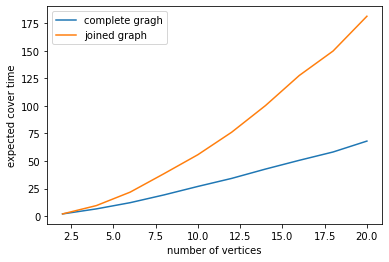

In [38]:
import matplotlib.pyplot as plt
plt.plot(vertices,G1_ect,label = "complete gragh")
plt.plot(vertices,G2_ect,label = "joined graph")
plt.xlabel('number of vertices')
plt.ylabel('expected cover time')
plt.legend()
plt.show()